<div style="border: 2px solid darkred; /* Add border around the box */
           color: darkred;
           display: fill;
           border-radius: 5px;
           background-color: lightgray;
           font-size: 100%;
           font-family: Verdana;
           letter-spacing: 0.8px">
  <h1 style="padding: 20px 20px;  /* Equal padding on top and bottom */
           color: darkred;
           margin: 0; /* Remove default margin to prevent extra space */
           text-align: center;"><strong>YOLOv8 Object Detection on Self-Driving-Car                                                   Data</strong></h1>
</div>

[](http://https://bernardmarr.com/img/How%20Tesla%20Is%20Using%20Artificial%20Intelligence%20to%20Create%20The%20Autonomous%20Cars%20Of%20The%20Future.jpg)

![self_driving](https://bernardmarr.com/wp-content/uploads/2021/07/How-Tesla-Is-Using-Artificial-Intelligence-to-Create-The-Autonomous-Cars-Of-The-Future.jpg)

<div style="border: 2px solid darkred;
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.4px;
            text-align: justify; /* Align text and create even lines */
            padding: 20px;"> <!-- Added padding to create paragraph shape -->
  <p style="margin: 0;"> <!-- Removed padding from the paragraph style -->
  <h5><strong>📌 What is YOLO?</strong></h5><br> You Only Look Once (YOLO) is a cutting-edge <strong>object detection</strong> method that significantly speeds up and simplifies the process of identifying objects in images and videos. Unlike traditional approaches, YOLO treats object detection as a single step, predicting object positions and categories directly.<br> By doing so, it achieves real-time detection without sacrificing accuracy. YOLO's neural network architecture processes images swiftly, making it valuable for applications like self-driving cars, surveillance, and robotics.<br> YOLO's unique approach has revolutionized object detection by making it faster and more accessible while maintaining high performance.
</p>
</div>


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;"><strong>Importing libraries:</strong><br> We've brought in NumPy to empower us for various numerical operations, while Matplotlib and PIL assist with visualization. Additionally, OpenCV (cv2) aids in advanced computer vision tasks, 'glob' helps with file handling, and 'random' provides randomness for diverse scenarios 
</p>
</div>

In [1]:
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

In [2]:
!pip install ultralytics 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 15.1 MB/s eta 0:00:00a 0:00:01


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">  <strong>📌 YOLOv8</strong> is a group of neural network models. These models were created and trained using PyTorch and exported to files with the <strong>.pt</strong> extension. In this project we use the <strong> yolov8m.pt</strong>
which is a middle-sized model for object detection.<br>All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. 
</p>
</div>


In [3]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 242MB/s]


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In this section we have loaded the <strong>self-driving-cars</strong> image dataset which is used for training and testing autonomous vehicle systems and is crucial for developing and evaluating the performance of self-driving algorithms and models. <br>Then we have
randomly selected some images to implement yolov8 model on them as samples.
</p>
</div>

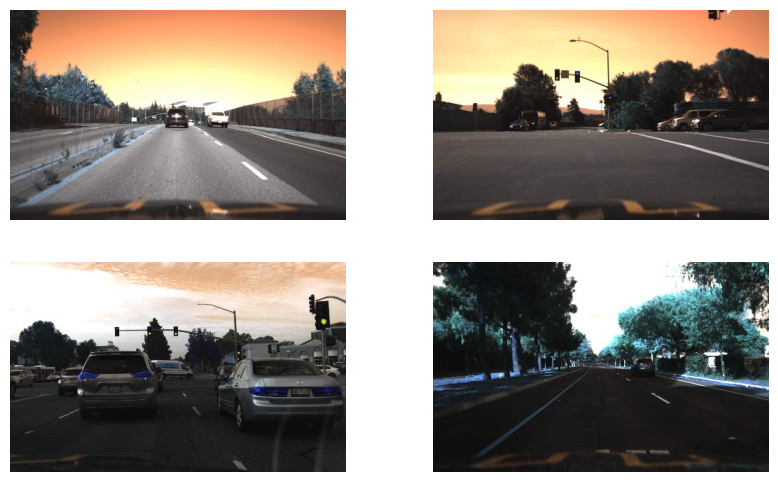

In [4]:
root_path = '/kaggle/input/self-driving-cars/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(10,6))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')


<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In this section, we have extracted significant results from the pre-trained YOLOv8 model, including the <strong>'name of the detected object</strong>,' <strong>'bounding box coordinates'</strong>, and <strong>'detection probabilities'</strong>.<br> The results for the samples have been calculated separately.
</p>
</div>

In [5]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



image 1/1 /kaggle/input/self-driving-cars/images/1479503448308395058.jpg: 416x640 2 cars, 1 train, 1 truck, 820.1ms
Speed: 18.7ms preprocess, 820.1ms inference, 19.0ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [220.95350646972656, 140.16171264648438, 255.32276916503906, 168.73902893066406]
Confidence is: 0.87
-------
Object 2 is: truck
Coordinates are: [281.28521728515625, 144.9611358642578, 312.4505920410156, 168.48170471191406]
Confidence is: 0.54
-------
Object 3 is: car
Coordinates are: [280.9623718261719, 144.85523986816406, 312.2812805175781, 168.6031036376953]
Confidence is: 0.42
-------
Object 4 is: train
Coordinates are: [0.21370697021484375, 114.61935424804688, 162.33302307128906, 164.4733428955078]
Confidence is: 0.34
-------

image 1/1 /kaggle/input/self-driving-cars/images/1479501526659072055.jpg: 416x640 5 cars, 1 bus, 1 truck, 6 traffic lights, 701.7ms
Speed: 2.8ms preprocess, 701.7ms inference, 1.7ms postprocess per image at shap

<div style="border: 2px solid darkred; /* Add border around the box */
            color: darkred;
            display: fill;
            border-radius: 5px;
            background-color: lightgray;
            font-size: 100%;
            font-family: Verdana;
            letter-spacing: 0.8px">
  <p style="padding: 20px 20px;  /* Equal padding on top and bottom */
            color: darkred;
            margin: 0; /* Remove default margin to prevent extra space */
            text-align: left;">In the last section, the results for the samples have been presented visually..
</p>
</div>



-------------------------------------- Images after object detection with YOLOV8 --------------------------------


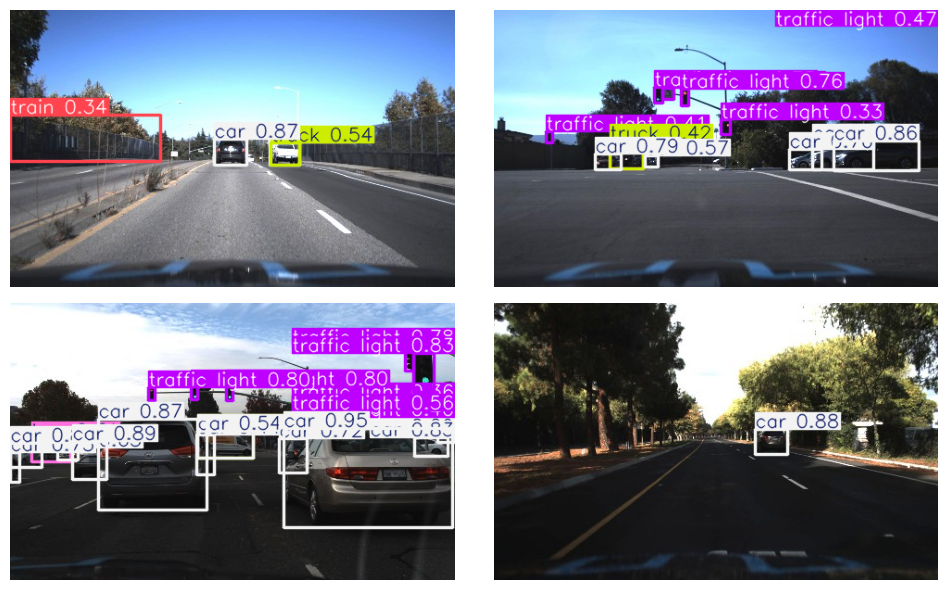

In [6]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')    

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')    
plt.tight_layout()
plt.show()